<a href="https://colab.research.google.com/github/KameshLeVI/Neural-Network-Regression-Model/blob/main/DL_Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
dataset1 = pd.read_csv('dataset1.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [17]:
# Name:Kamesh D
# Register Number:212222240043

class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1, 5)
    self.fc2 = nn.Linear(5, 7)
    self.fc3 = nn.Linear(7, 1)
    self.relu = nn.ReLU()
    self.history = {'loss':[]}
  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [18]:
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [46]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [47]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 0.010462
Epoch [200/2000], Loss: 0.010866
Epoch [400/2000], Loss: 0.010316
Epoch [600/2000], Loss: 0.011143
Epoch [800/2000], Loss: 0.010343
Epoch [1000/2000], Loss: 0.011086
Epoch [1200/2000], Loss: 0.010760
Epoch [1400/2000], Loss: 0.010325
Epoch [1600/2000], Loss: 0.011064
Epoch [1800/2000], Loss: 0.010456


In [48]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 3.493908


In [49]:
loss_df = pd.DataFrame(ai_brain.history)

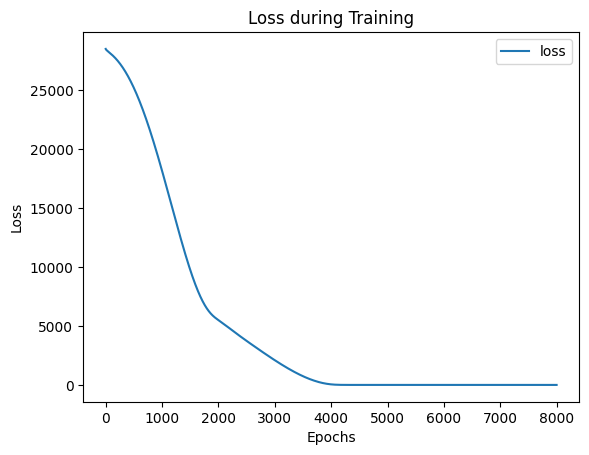

In [50]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [53]:
X_n1_1 = torch.tensor([[7]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 71.06951904296875


In [52]:
df = pd.read_csv('/content/dataset1.csv')
print(df)

    Input  Output
0       1      11
1       2      21
2       3      31
3       4      41
4       5      51
5       6      61
6       7      71
7       8      81
8       9      91
9      11     111
10     13     131
11     14     141
12     15     151
13     17     171
14     24     241
15     28     281
16     30     301
17     33     331
18     35     351
